The code throughout this package was written in Julia v1.9. We begin by downloading dependices and loading the relevant modules.

In [1]:
# download dependencies
include("dependencies.jl");
# include files
include("main.jl");

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
# path for saving data and plots
data_path="Results/";
plot_path="Plots/";

## Bound Kerr geodesics

We first compute a bound geodesic in Kerr, from which we will later build a semi-relativsitic gravitational waveform.

In [3]:
# specify params
a = 0.4; p = 10.5; e = 0.5; θi = π/2; M=1.0; m=1.0; τmax=3000.0;

In [4]:
# solve geodesic equation, specifically built for Kerr
@time Kerr.KerrGeodesics.compute_kerr_geodesic(a, p, e, θi, τmax, data_path=data_path)

ODE saved to: Results/ODE_sol_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt
 15.062033 seconds (48.45 M allocations: 2.623 GiB, 8.45% gc time, 95.91% compilation time)


WebIO._IJuliaInit()

File saved: Plots/3d_orbit_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt


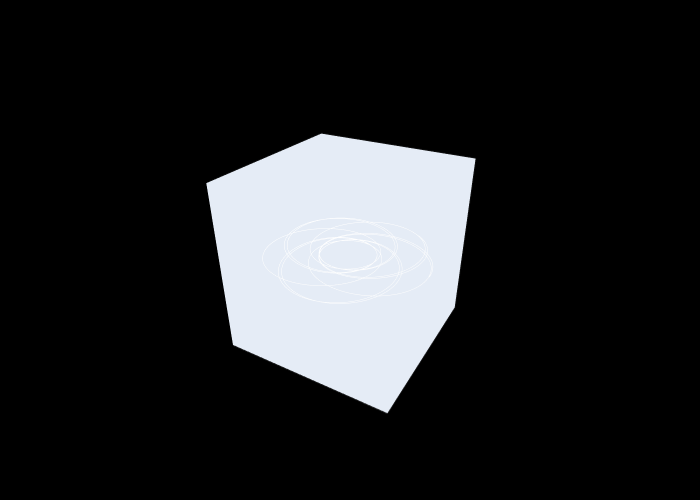

In [5]:
# plot solution
kerr_ode_sol_fname = "Results/ODE_sol_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt"
kerr_orbit_fname = "3d_orbit_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt"
zlims = (-5, 5)
GRPlotLib.plot_orbit(kerr_ode_sol_fname, kerr_orbit_fname, zlims, plot_path=plot_path)

NB: for some reason, the html doesn't properly save when this code is ran in a notebook. To download an accessible hmtl file, run this code in the REPL.

File saved: Plots/xy_orbit_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.pdf


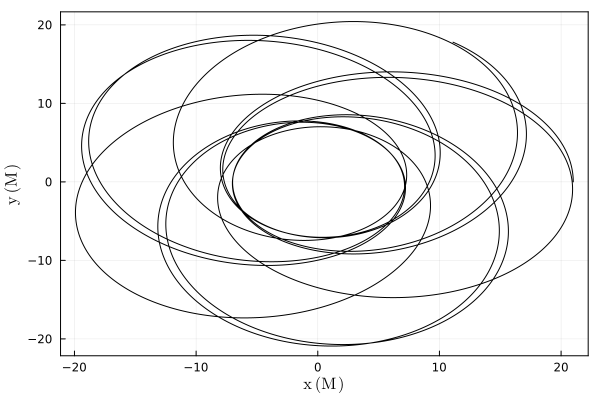

In [6]:
# plot x-y plane orbit
xlims = (-11, 11)
ylims =  (-11, 11)
kerr_xy_fname = "xy_orbit_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.pdf"
GRPlotLib.plot_xy_orbit(kerr_ode_sol_fname, kerr_xy_fname, xlims, ylims, plot_path=plot_path, color=:black, legend=:false, framestyle=:box)

## Geodesics in an arbitrary axisymmetric and stationary spacetime 

We will now compute a geodesic using a more arbitrary metric. This function evolves the geodesic equation by numerically evaluating the various derivatives of the metric to compute the Christoffel symbols. In this example, we will use the Kerr metric as our "generic" metric, so that the results can be compared with the functions specific to Kerr as a consistency check. The idea here is that you can replace the Kerr metric below with your favourite (stationary and axisymmetric) metric, which must also be a function of $t, r, θ, ϕ, a,$ and $M$.

In [7]:
Γαμν(t, r, θ, ϕ, a, M, α, μ, ν) = Kerr.KerrMetric.Γαμν(t, r, θ, ϕ, a, M, α, μ, ν);   # Christoffel symbols

# covariant metric components
g_tt(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.g_tt(t, r, θ, ϕ, a, M);
g_tϕ(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.g_tϕ(t, r, θ, ϕ, a, M);
g_rr(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.g_rr(t, r, θ, ϕ, a, M);
g_θθ(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.g_θθ(t, r, θ, ϕ, a, M);
g_ϕϕ(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.g_ϕϕ(t, r, θ, ϕ, a, M);
g_μν(t, r, θ, ϕ, a, M, μ, ν) = Kerr.KerrMetric.g_μν(t, r, θ, ϕ, a, M, μ, ν); 

# contravariant metric components
gTT(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.gTT(t, r, θ, ϕ, a, M);
gTΦ(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.gTΦ(t, r, θ, ϕ, a, M);
gRR(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.gRR(t, r, θ, ϕ, a, M);
gThTh(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.gThTh(t, r, θ, ϕ, a, M);
gΦΦ(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.gΦΦ(t, r, θ, ϕ, a, M);
ginv(t, r, θ, ϕ, a, M) = Kerr.KerrMetric.ginv(t, r, θ, ϕ, a, M);

In [8]:
# calculate initial conditions
E, L, Q = Kerr.ConstantsOfMotion.ELQ(a, p, e, θi);
ra = p * M / (1 - e); ri = ra; θi=π/2;
ics = Kerr.KerrGeodesics.boundKerr_ics(a, M, m, E, L, ri, θi, g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ);

In the above cell, we use a function specific to Kerr to calculate the initial values of the constants of motions $E, L,$ and $Q$, and from them we compute the initial conditions. This is fine because our "generic" metric in this notebook is taken to be Kerr. For a general metric, another way we can choose values for $E$, and $L$ is via trial and error with the effective potential. That is, we can choose $E, L$, and $\theta$i, and plot $V_\text{eff}$ for different values of $r$. We can then see by inspection if bound orbits are permitted for our choice of $E, L$, and $\theta$i. If so, then we can use $V_\text{eff}$ to appropriately choose $r$i, and thereby complete the construction of our initial conditions. Otherwise we can try different values for $E, L$, and $\theta$i and repeat.

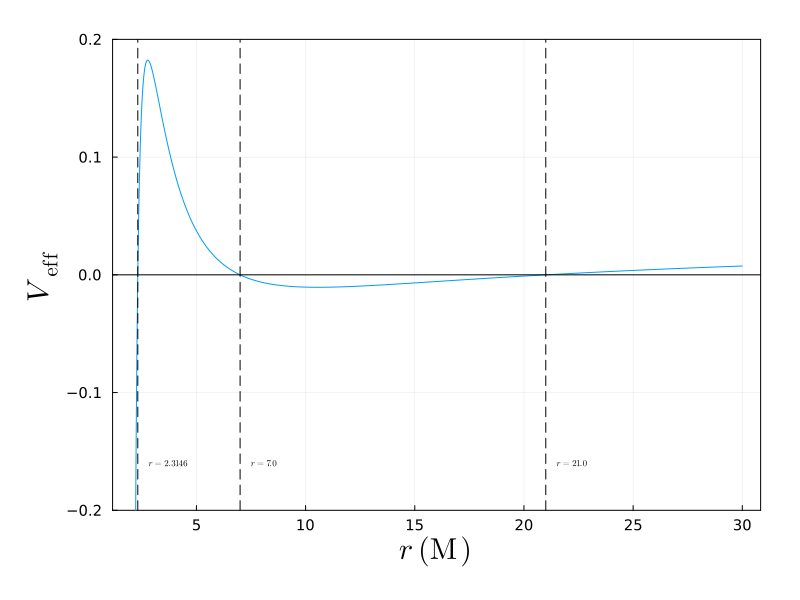

In [9]:
# plot Veff
M=1.0; m=1.0; ϕi = 0.0; ylims=(-0.2, 0.2);   # some plot kwargs
GRPlotLib.plot_vEff(θi, ϕi, a, M, E, L, m, g_tt, g_tϕ, g_ϕϕ, ylims)    

In [10]:
# now we can find the roots of Veff (if they exist) and appropriately prescribe one of these as our initial r, if bound orbits exist 
using Roots
f(r) = EffPotential.vEff(0., r, θi, ϕi, a, M, E, L, m, g_tt, g_tϕ, g_ϕϕ)
roots = find_zeros(f, 2M, 30M);
roots

3-element Vector{Float64}:
  2.314590641548965
  7.000000000000136
 20.999999999999964

In [11]:
# now construct inital conditions
ti = 0.0; ϕi = 0.0; ri=roots[3]; xi = [ti, ri, θi, ϕi]; uri = 0.0;
uti = NumericalGeodesics.tdot(xi..., a, M, E, L, g_ϕϕ, g_tϕ, g_tt); 
uϕi = NumericalGeodesics.ϕdot(xi..., a, M, E, L, g_ϕϕ, g_tϕ, g_tt);

# compute square of uθi, obtained from the Lagrangian
uθi² = (-1 - g_rr(xi..., a, M) * uri^2 - g_tt(xi..., a, M) * uti^2 - 2.0 * g_tϕ(xi..., a, M) * uti * uϕi - g_ϕϕ(xi..., a, M) * uϕi^2) / g_θθ(xi..., a, M)
uθi = abs(uθi²) <= 1e-14 ? 0. : sqrt(uθi²)  ? 0. : sqrt(uθi²)   # replace solutions close to zero by zero exactly
uxi = [uti, uri, uθi, uϕi]
ics1 = [uxi, xi];

In [12]:
# as a check, we should find that the initial conditions are the same because we are working solely in Kerr, and
# we chose ri=roots[3]=ra (apastron)
ics-ics1

2-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, -2.7755575615628914e-17]
 [0.0, 3.552713678800501e-14, 0.0, 0.0]

Now, after constructing initial conditions one way or another, we are ready to solve the geodesic equation for a "generic" metric.

In [13]:
# solve geodesic equation for "generic" metric
@time NumericalGeodesics.compute_geodesic(g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ, ginv, ics, a, E, L; data_path=data_path)

ODE saved to: Results/numerical_ODE_sol_E_0.966_L_3.737_a_0.4_tol_1.0e-6.txt
 14.465717 seconds (39.84 M allocations: 1.863 GiB, 7.58% gc time, 91.30% compilation time)


File saved: Plots/xy_n_orbit_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.pdf


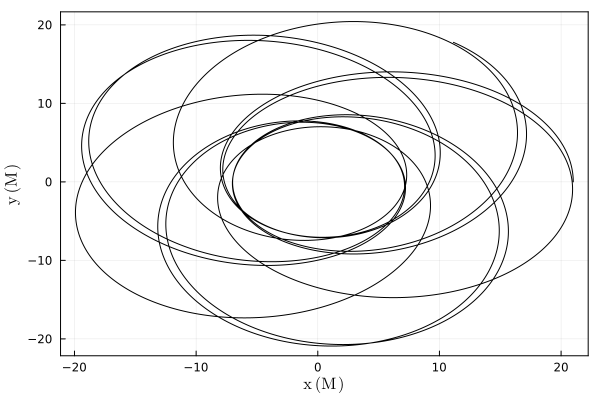

In [14]:
# plot x-y plane orbit
xlims = (-11, 11)
ylims =  (-11, 11)
generic_ode_sol_fname = "Results/numerical_ODE_sol_E_0.966_L_3.737_a_0.4_tol_1.0e-6.txt"
generic_xy_fname = "xy_n_orbit_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.pdf"
GRPlotLib.plot_xy_orbit(generic_ode_sol_fname, generic_xy_fname, xlims, ylims, plot_path=plot_path, color=:black, legend=:false, framestyle=:box)

As expected, this plot looks the same as the one above since our "generic" metric is still Kerr.

## Semi-relativistic kludge gravitational waveforms

We now compute semi-relativistic kludge waveforms, ignoring radiation reaction effects, using the method desrcibed in https://arxiv.org/abs/gr-qc/0607007. We again do this for both the kerr-specific solution to the geodesic equation, and the "generic" solution to demonstrate consistency.

In [15]:
# compute and save waveforms
kerr_waveform_fname="kerr_SR_GW_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt"
generic_waveform_fname="generic_SR_GW_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt"
Θ=π/4; Φ=0.; obs_distance=1.;  # observer inclination, azimuth, and distance
KludgeWaveforms.SemiRelativistic.Kerr_waveform(kerr_ode_sol_fname, kerr_waveform_fname, Θ, Φ, obs_distance, data_path=data_path)
KludgeWaveforms.SemiRelativistic.waveform(generic_ode_sol_fname, generic_waveform_fname, Θ, Φ, obs_distance, data_path=data_path)

Waveform saved to: Results/kerr_SR_GW_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt
Waveform saved to: Results/generic_SR_GW_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt


Kerr-specific


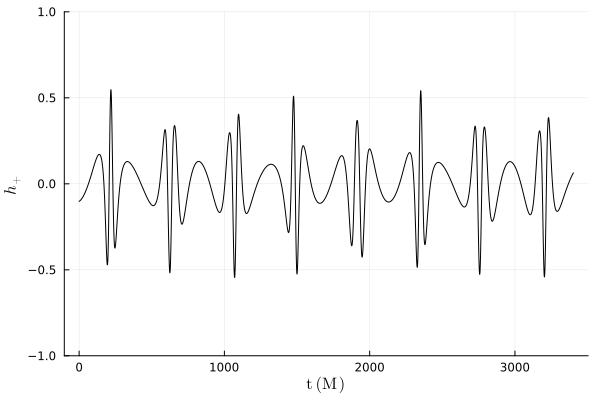

Generic metric


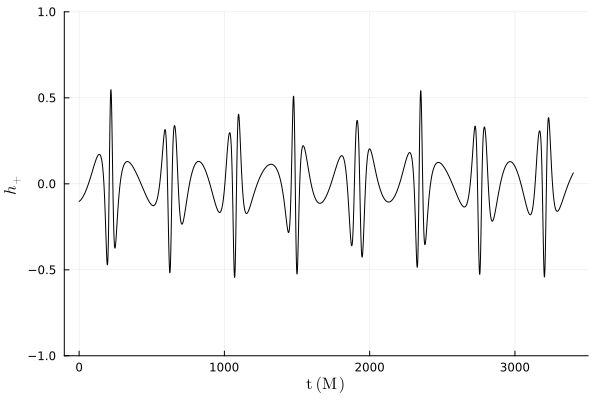

In [16]:
# waveform file names including the path
kerr_waveform_fname = data_path * "kerr_SR_GW_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt"
generic_waveform_fname= data_path * "generic_SR_GW_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.txt"
kerr_waveform_plot_fname="kerr_SR_WF_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.pdf"
generic_waveform_plot_fname="generic_SR_WF_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.pdf"

ylims=(-1, 1)
# plots
println("Kerr-specific")
GRPlotLib.plot_waveform(kerr_waveform_fname, kerr_waveform_plot_fname; plot_path=plot_path, color=:black, legend=:false, ylims=ylims)
println("Generic metric")
GRPlotLib.plot_waveform(generic_waveform_fname, generic_waveform_plot_fname; plot_path=plot_path, color=:black, legend=:false, ylims=ylims)

And, as expected, the semi-relativstic waveforms look the same. Below, we produce a gif that shows the evolution of the waveform as the trajectory (projected onto the xy-plane) evolves.

[ Info: Saved animation to /Users/lennoxkeeble/Physics_Research/EMRIs/Julia_package/Plots/kerr_SR_WF_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.gif


Plots.AnimatedGif("/Users/lennoxkeeble/Physics_Research/EMRIs/Julia_package/Plots/kerr_SR_WF_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.gif")
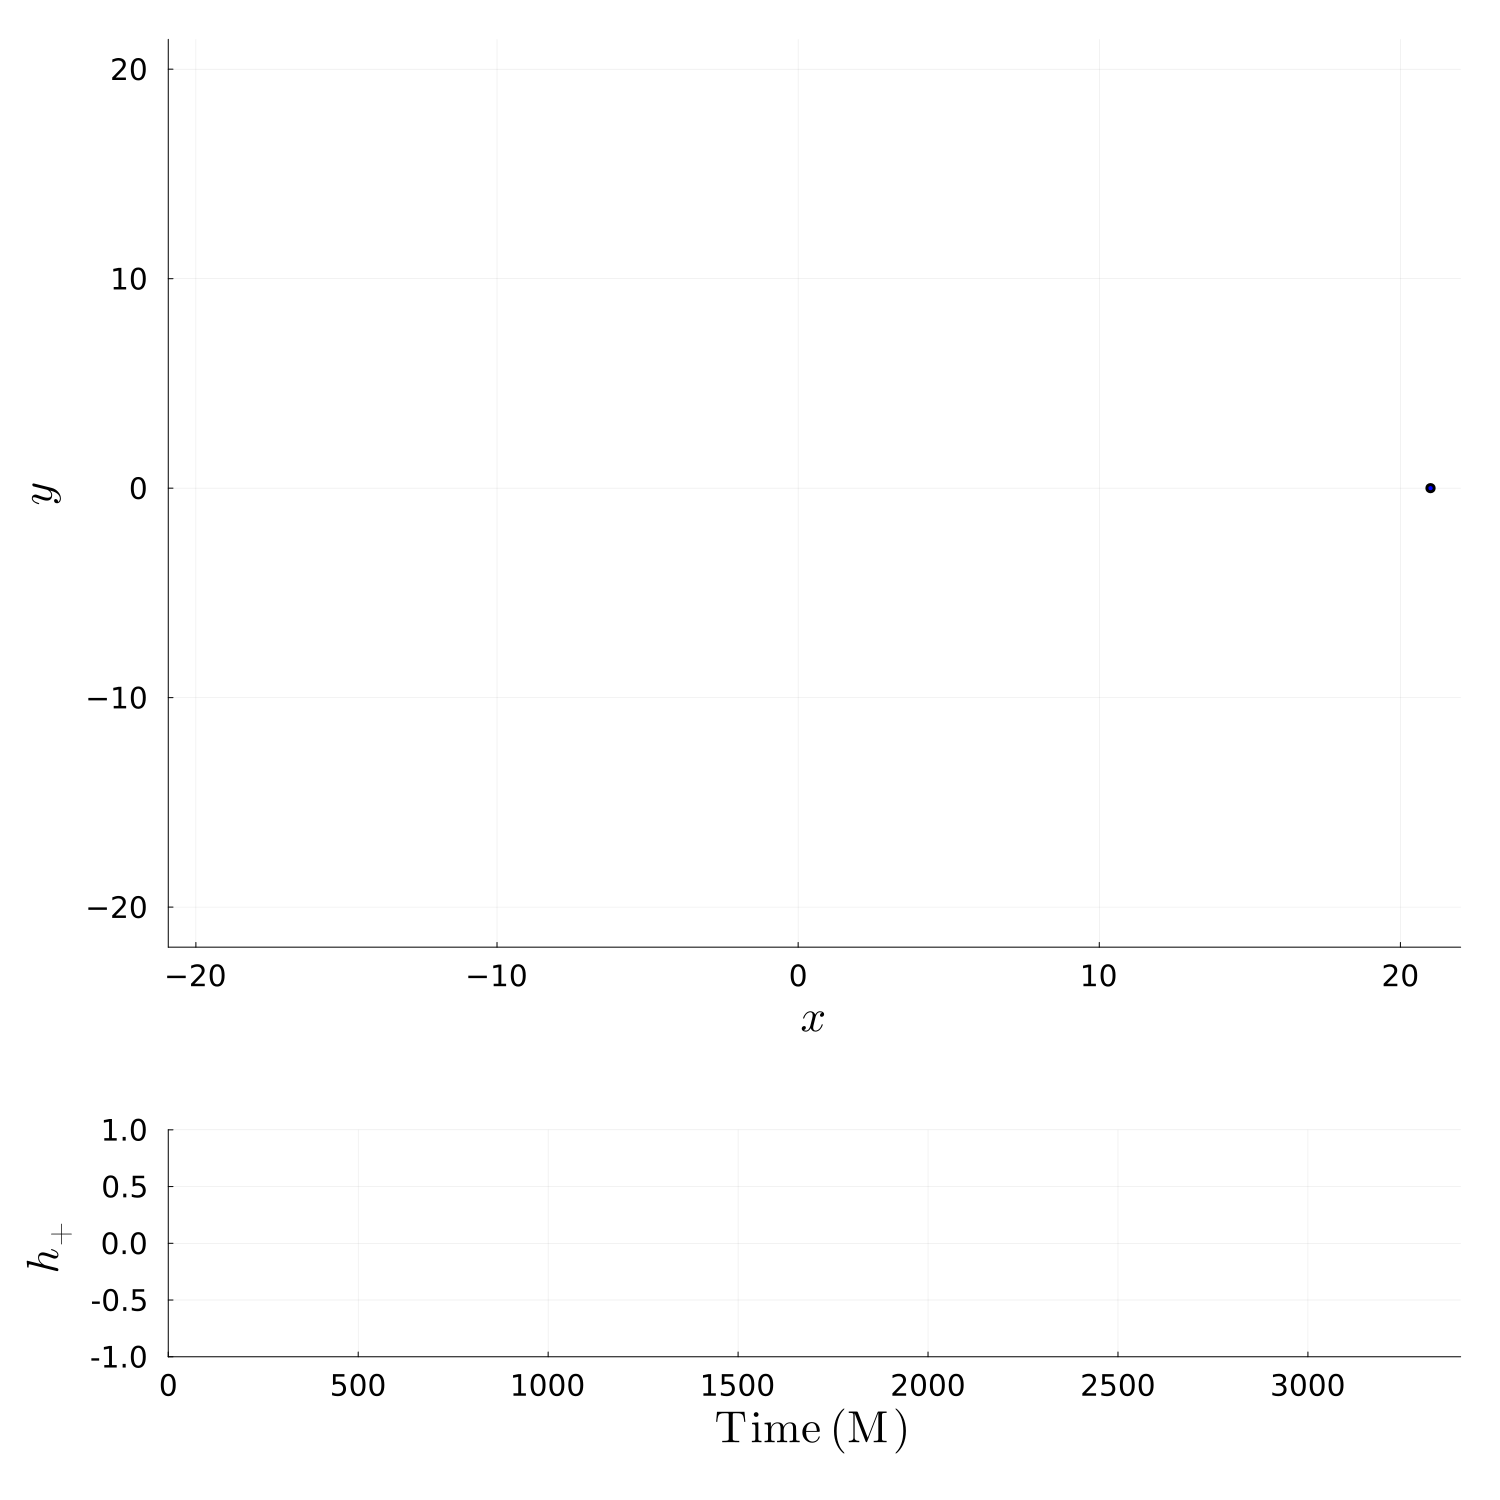

In [17]:
# produces gif following evolution of waveform with the particle trajectory. The .gif file is best opened in the 
# a web browser
gif_fname = "kerr_SR_WF_a_0.4_p_10.5_e_0.5_θi_1.571_tstep_0.5_T_3000.0_tol_1.0e-16.gif" 
GRPlotLib.waveform_xy_orbit_gif(kerr_ode_sol_fname, kerr_waveform_fname, gif_fname, plot_path=plot_path, xTicks=500, ylims=(-1, 1), yTicks=0.5, fps=25)

## Extreme-mass-ratio inspiral (EMRI)

We now compute an EMRI trajectory, including radiation reaction effects, using the method described in https://arxiv.org/abs/1109.0572. Currently, the computation of an EMRI is limited to Kerr.

In [18]:
τMax = 10000.0;   # evolve trajectory for up to τMax seconds (proper time)
nPoints = 20;    # update the self-acceleration every 20 points, i.e., each piecewise geodesic consists of 20 points
a=0.1; p=10.0; e=0.0; θi=π/2; M=1.0; m=10^-1;

# compute inspiral
@time SelfForce.compute_inspiral!(τMax, nPoints, M, m, a, p, e, θi,  Γαμν, g_μν, g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ, gTT, gTΦ, gRR, gThTh, gΦΦ, data_path=data_path)

LSO reached at t = 1373.8344151861916
Self-force file saved to: Results/aSF_a_0.1_p_10.0_e_0.0_θi_1.571_q_0.1_tstep_0.5_T_10000.0_tol_1.0e-16.txt
ODE saved to: Results/EMRI_ODE_sol_a_0.1_p_10.0_e_0.0_θi_1.571_q_0.1_tstep_0.5_T_10000.0_tol_1.0e-16.txt
 30.193016 seconds (360.94 M allocations: 8.064 GiB, 8.89% gc time, 58.39% compilation time)


File saved: Plots/EMRI_3d_orbit_a_0.1_p_10.0_e_0.0_θi_1.571_q_0.1_tstep_0.5_T_10000.0_tol_1.0e-16


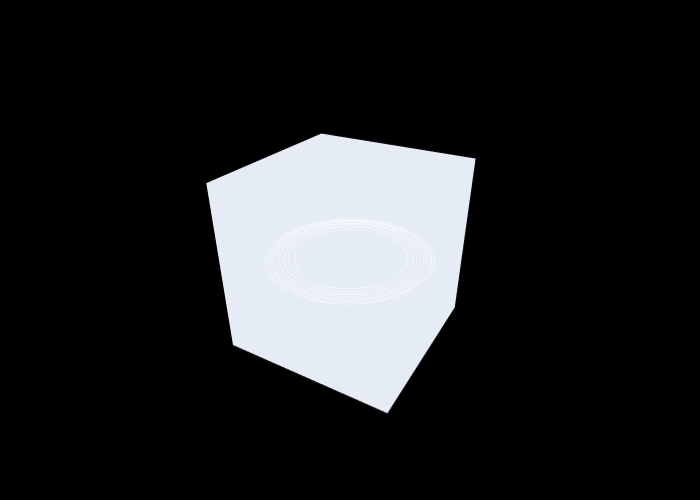

In [19]:
# plot orbit solution
EMRI_ode_sol_fname = "Results/EMRI_ODE_sol_a_0.1_p_10.0_e_0.0_θi_1.571_q_0.1_tstep_0.5_T_10000.0_tol_1.0e-16.txt"
EMRI_orbit_fname = "EMRI_3d_orbit_a_0.1_p_10.0_e_0.0_θi_1.571_q_0.1_tstep_0.5_T_10000.0_tol_1.0e-16"
zlims = (-5, 5);
GRPlotLib.plot_orbit(EMRI_ode_sol_fname, EMRI_orbit_fname, zlims, plot_path=plot_path)

File saved: Plots/EMRI_xy_orbit_a_0.1_p_10.0_e_0.0_θi_1.571_q_0.1_tstep_0.5_T_10000.0_tol_1.0e-16.pdf


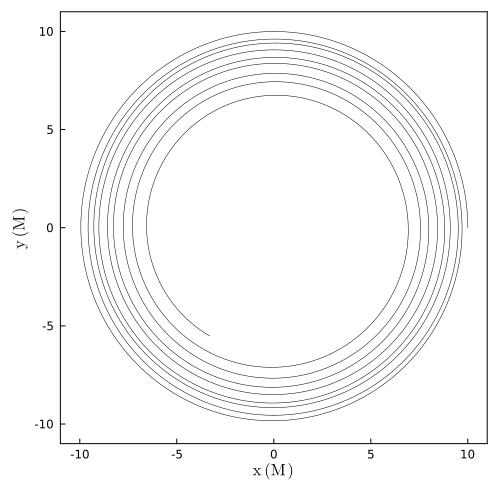

In [20]:
# plot x-y plane orbit
xlims = (-11, 11)
ylims =  (-11, 11)
EMRI_xy_fname = "EMRI_xy_orbit_a_0.1_p_10.0_e_0.0_θi_1.571_q_0.1_tstep_0.5_T_10000.0_tol_1.0e-16.pdf"
GRPlotLib.plot_xy_orbit(EMRI_ode_sol_fname, EMRI_xy_fname, xlims, ylims, plot_path=plot_path,
xlims=(-11, 11), xticks=(-10:5:10, ["-10" "-5" "0" "5" "10"]),
ylims=(-11, 11), yticks=(-10:5:10, ["-10" "-5" "0" "5" "10"]),
size=(500, 500), color=:black, linewidth=0.5,
legend=false, grid=false, framestyle=:box)